In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
#import mnist data
(x_train_orig, y_train), (x_test_orig, y_test) = tf.keras.datasets.mnist.load_data()
#dimensions of dataset

print('x_train_orig shape: ' + str(x_train_orig.shape))
print('y_train shape: ' + str(y_train.shape))

x_train_orig shape: (60000, 28, 28)
y_train shape: (60000,)


In [11]:
## Nomalize train and test sets
x_train_orig = tf.keras.utils.normalize(x_train_orig, axis = 1)
x_test_orig = tf.keras.utils.normalize(x_test_orig, axis = 1)

## create a model with layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

## fix parameters for model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

## train model with normalized data
model.fit(x_train_orig, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 13s 214us/step - loss: 0.2524 - acc: 0.9230
Epoch 2/3
60000/60000 [==============================] - 12s 197us/step - loss: 0.1064 - acc: 0.9684
Epoch 3/3
60000/60000 [==============================] - 12s 193us/step - loss: 0.0771 - acc: 0.9765


In [3]:
## get results
val_loss, val_acc = model.evaluate(x_test_orig, y_test)


10000/10000 [==============================] - 0s 41us/step


In [4]:
## prediction
model.save('first_pic_classif_ml')
new_model = tf.keras.models.load_model('first_pic_classif_ml')
predictions = new_model.predict(x_test_orig)
print (predictions)

[[3.9179740e-06 2.9568412e-06 7.4276344e-05 ... 9.9924785e-01
  2.6053016e-07 2.7118251e-05]
 [5.0606849e-07 1.8618356e-02 9.7877240e-01 ... 1.5257923e-07
  2.6527928e-06 1.7874584e-08]
 [1.5673569e-06 9.9983835e-01 1.9362526e-06 ... 1.1417226e-04
  1.9087942e-05 8.1964907e-07]
 ...
 [8.5523209e-07 2.3975674e-06 1.2908762e-07 ... 8.1526079e-05
  1.3637322e-05 1.2299046e-05]
 [4.6247264e-06 4.4247059e-08 3.8057215e-09 ... 1.8682901e-07
  3.6768524e-05 3.5151080e-09]
 [3.1090344e-06 4.9649827e-08 8.9316949e-08 ... 3.3928496e-09
  4.7396964e-07 2.8188720e-09]]


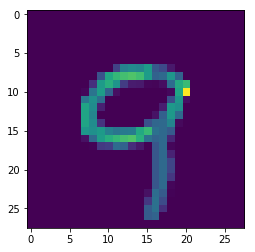

In [7]:
# print out the picture in test set
plt.imshow(x_test_orig[105])

In [8]:
## print out prediction
print(np.argmax(predictions[105]))

9
